In [1]:
import numpy as np
import pandas as pd

In [2]:
##import tensorflow as tf
##tf.logging.set_verbosity(tf.logging.ERROR)

import keras as ks
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
## Read in the entire data set just for eyeballing.
pd_data = pd.read_csv('K_data.csv', header=None)
np_data = np.array(pd_data.values, dtype=np.float32) ## float32 might be better if using a GPU
pd_data

,0,1,2,3,4,5
0,1.729100e-03,1.509,0.52360,3,2,0.0100
1,1.965300e-03,1.558,0.54105,3,2,0.0100
2,2.224300e-03,1.607,0.55851,3,2,0.0100
3,2.507300e-03,1.656,0.57596,3,2,0.0100
4,2.815600e-03,1.705,0.59341,3,2,0.0100
5,3.150700e-03,1.753,0.61087,3,2,0.0100
6,3.513700e-03,1.802,0.62832,3,2,0.0100
7,3.906100e-03,1.850,0.64577,3,2,0.0100
8,4.329200e-03,1.898,0.66323,3,2,0.0100
9,4.784300e-03,1.946,0.68068,3,2,0.0100


In [4]:
## Read in the training data, which includes both the input features and the outputs K.
pd_train = pd.read_csv('K_training_randomized.csv', header=None)
np_train = np.array(pd_train.values, dtype=np.float32) ## float32 might be better if using a GPU
np_train

array([[2.6582e-04, 9.4500e-01, 1.5010e+00, ..., 4.0000e+00, 1.0000e-02,
        2.0000e-01],
       [6.9525e-03, 2.1370e+00, 7.5049e-01, ..., 2.0000e+00, 1.0000e-02,
        5.0000e-01],
       [5.4947e-12, 1.1000e-02, 5.2360e-01, ..., 4.0000e+00, 1.0000e-03,
        6.0000e-01],
       ...,
       [1.3298e-10, 2.5000e-02, 1.2217e+00, ..., 4.0000e+00, 1.0000e-03,
        9.9180e+02],
       [2.5089e-16, 1.0000e-03, 1.4835e+00, ..., 4.0000e+00, 1.0000e-04,
        9.9600e+02],
       [1.9636e-06, 2.7700e-01, 9.0757e-01, ..., 2.0000e+00, 1.0000e-04,
        9.9640e+02]], dtype=float32)

In [6]:
## Extract the input features: theta, m, n, h_star
features = np_train[:, 2:6]
features

array([[1.5010e+00, 9.0000e+00, 4.0000e+00, 1.0000e-02],
       [7.5049e-01, 3.0000e+00, 2.0000e+00, 1.0000e-02],
       [5.2360e-01, 9.0000e+00, 4.0000e+00, 1.0000e-03],
       ...,
       [1.2217e+00, 9.0000e+00, 4.0000e+00, 1.0000e-03],
       [1.4835e+00, 9.0000e+00, 4.0000e+00, 1.0000e-04],
       [9.0757e-01, 3.0000e+00, 2.0000e+00, 1.0000e-04]], dtype=float32)

In [9]:
## Extract the correct outputs K
correct_outputs = np_train[:, 1]
correct_outputs[1:5]

array([2.137, 0.011, 0.03 , 0.022], dtype=float32)

In [10]:
## Read in the test data, which includes both the input features and the outputs K.
pd_test = pd.read_csv('K_testing.csv', header=None)
np_test = pd_test.values
num_tests = len(np_test)

In [11]:
##  Define a model.
layer_0 = ks.layers.Dense(units=50, input_shape=[4])
layer_1 = ks.layers.Dense(units=50, input_shape=[4])
layer_2 = ks.layers.Dense(units=1)
model_0 = ks.Sequential([layer_0, layer_1, layer_2])
model_0.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_0.compile(loss='mean_squared_error',
              optimizer=ks.optimizers.Adam(0.1))

In [13]:
history_0 = model_0.fit(features, correct_outputs, epochs=250, verbose=True)
print("Finished training the model")

Instructions for updating:
Use tf.cast instead.
Epoch 1/250
540/540 [==============================] - 0s 419us/step - loss: 277.2665
Epoch 2/250
540/540 [==============================] - 0s 20us/step - loss: 22.8493
Epoch 3/250
540/540 [==============================] - 0s 20us/step - loss: 3.8196
Epoch 4/250
540/540 [==============================] - 0s 22us/step - loss: 1.5647
Epoch 5/250
540/540 [==============================] - 0s 20us/step - loss: 1.0697
Epoch 6/250
540/540 [==============================] - 0s 24us/step - loss: 0.9169
Epoch 7/250
540/540 [==============================] - 0s 23us/step - loss: 0.8502
Epoch 8/250
540/540 [==============================] - 0s 18us/step - loss: 0.8388
Epoch 9/250
540/540 [==============================] - 0s 22us/step - loss: 0.8308
Epoch 10/250
540/540 [==============================] - 0s 20us/step - loss: 0.8262
Epoch 11/250
540/540 [==============================] - 0s 27us/step - loss: 0.8341
Epoch 12/250
540/540 [===========

540/540 [==============================] - 0s 22us/step - loss: 0.2153
Epoch 96/250
540/540 [==============================] - 0s 18us/step - loss: 0.2951
Epoch 97/250
540/540 [==============================] - 0s 20us/step - loss: 0.3524
Epoch 98/250
540/540 [==============================] - 0s 20us/step - loss: 0.2438
Epoch 99/250
540/540 [==============================] - 0s 19us/step - loss: 0.2409
Epoch 100/250
540/540 [==============================] - 0s 18us/step - loss: 0.2098
Epoch 101/250
540/540 [==============================] - 0s 19us/step - loss: 0.2398
Epoch 102/250
540/540 [==============================] - 0s 18us/step - loss: 0.4008
Epoch 103/250
540/540 [==============================] - 0s 19us/step - loss: 0.2861
Epoch 104/250
540/540 [==============================] - 0s 18us/step - loss: 0.3288
Epoch 105/250
540/540 [==============================] - 0s 18us/step - loss: 0.2794
Epoch 106/250
540/540 [==============================] - 0s 18us/step - loss: 0.209

540/540 [==============================] - 0s 23us/step - loss: 0.2443
Epoch 192/250
540/540 [==============================] - 0s 21us/step - loss: 0.2695
Epoch 193/250
540/540 [==============================] - 0s 18us/step - loss: 0.2569
Epoch 194/250
540/540 [==============================] - 0s 22us/step - loss: 0.2392
Epoch 195/250
540/540 [==============================] - 0s 20us/step - loss: 0.2579
Epoch 196/250
540/540 [==============================] - 0s 18us/step - loss: 0.2556
Epoch 197/250
540/540 [==============================] - 0s 20us/step - loss: 0.3077
Epoch 198/250
540/540 [==============================] - 0s 19us/step - loss: 0.2173
Epoch 199/250
540/540 [==============================] - 0s 22us/step - loss: 0.2490
Epoch 200/250
540/540 [==============================] - 0s 22us/step - loss: 0.2175
Epoch 201/250
540/540 [==============================] - 0s 21us/step - loss: 0.2986
Epoch 202/250
540/540 [==============================] - 0s 20us/step - loss: 0

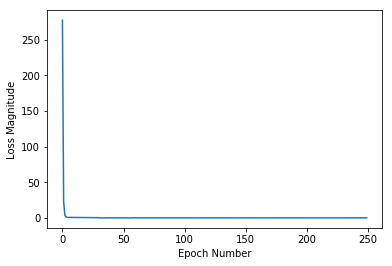

In [14]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_0.history['loss'])

In [15]:
## Run the test examples through the model.
errors = outputs = 0
for i in range(num_tests):
    test = np_test[i, 2:6]
    prediction = model_0.predict(np.array([test]))
    out = np_test[i, 1]
    
    print("Prediction: {}, Expected: {}".format(prediction[0][0], out))
    errors += abs(prediction - out)
    outputs += abs(out)
    
errors = errors[0][0]  ## Extract out the single real number.
print('')
print('Mean error on test set: {}'.format(errors / num_tests))
print('Mean error % on test set: {}'.format(errors / outputs * 100))

Prediction: 2.256197452545166, Expected: 1.5090000000000001
Prediction: 1.7513728141784668, Expected: 1.915
Prediction: 1.3969426155090332, Expected: 0.9540000000000001
Prediction: 0.4709588289260864, Expected: 0.547
Prediction: -0.020979464054107666, Expected: 0.214
Prediction: -0.37540972232818604, Expected: 0.031
Prediction: 0.3027198314666748, Expected: 0.179
Prediction: -0.18925464153289795, Expected: 0.022000000000000002
Prediction: -0.6079341173171997, Expected: 0.001

Mean error on test set: 0.3350118001302083
Mean error % on test set: 56.12632541273035
